In [22]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

In [10]:
# Load the dataset
social_comments_csv = pd.read_csv('dataset.csv')

/var/folders/d_/xnywg_9s3l96s65krslhm0hm0000gn/T/ipykernel_87150/460656977.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


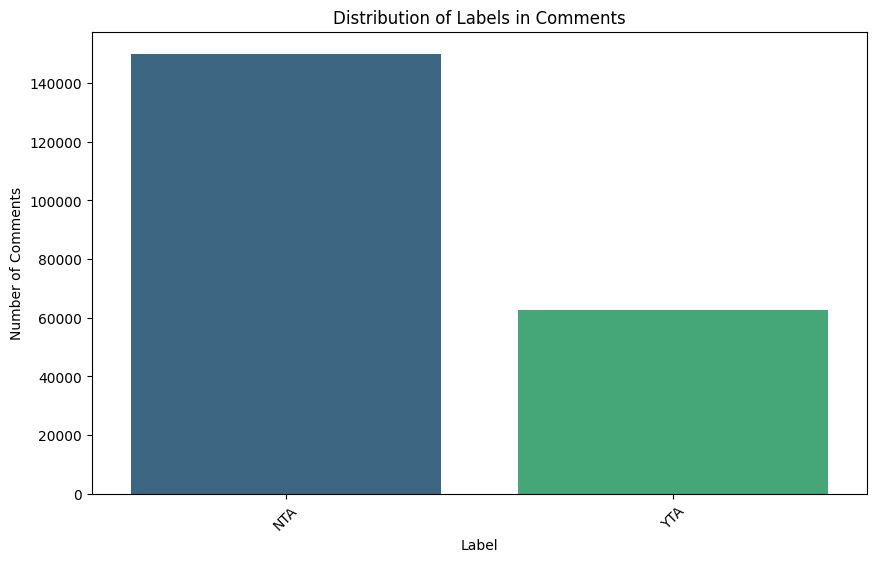

In [17]:
# Plot 1: Label Distribution

# Counting the frequency of each label
label_counts = social_comments_csv['label'].value_counts()

# Creating a bar chart for label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title('Distribution of Labels in Comments')
plt.xlabel('Label')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

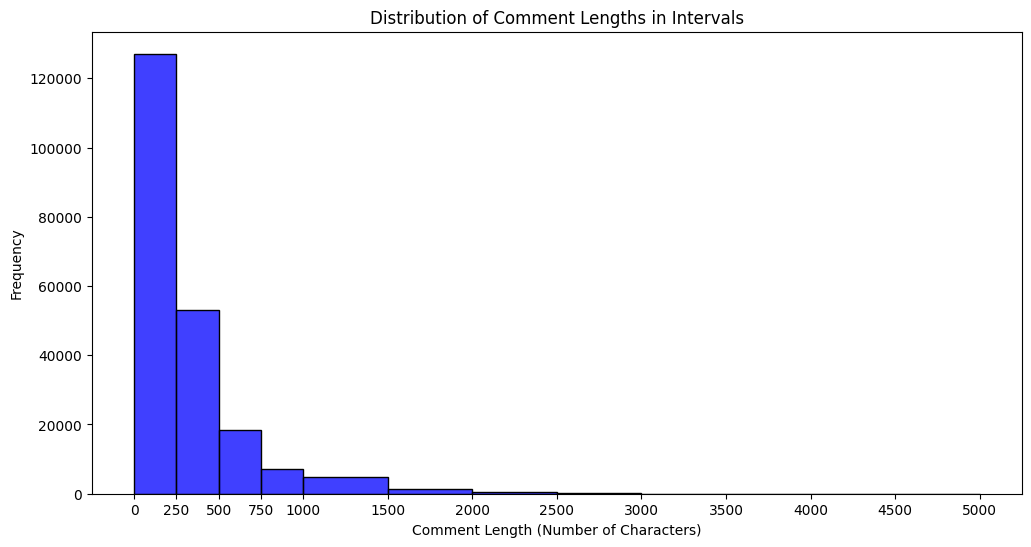

In [16]:
# Plot 2: Comment Length Analysis

# Adjusting the histogram for comment lengths to use specified intervals

# Setting the bins for the histogram
bins = [0, 250, 500, 750, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Creating the histogram with the specified bins
plt.figure(figsize=(12, 6))
sns.histplot(social_comments_csv['comment_length'],bins=bins, color='blue')
plt.title('Distribution of Comment Lengths in Intervals')
plt.xlabel('Comment Length (Number of Characters)')
plt.ylabel('Frequency')
plt.xticks(bins)
plt.show()


/var/folders/d_/xnywg_9s3l96s65krslhm0hm0000gn/T/ipykernel_87150/1705626814.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette="magma")


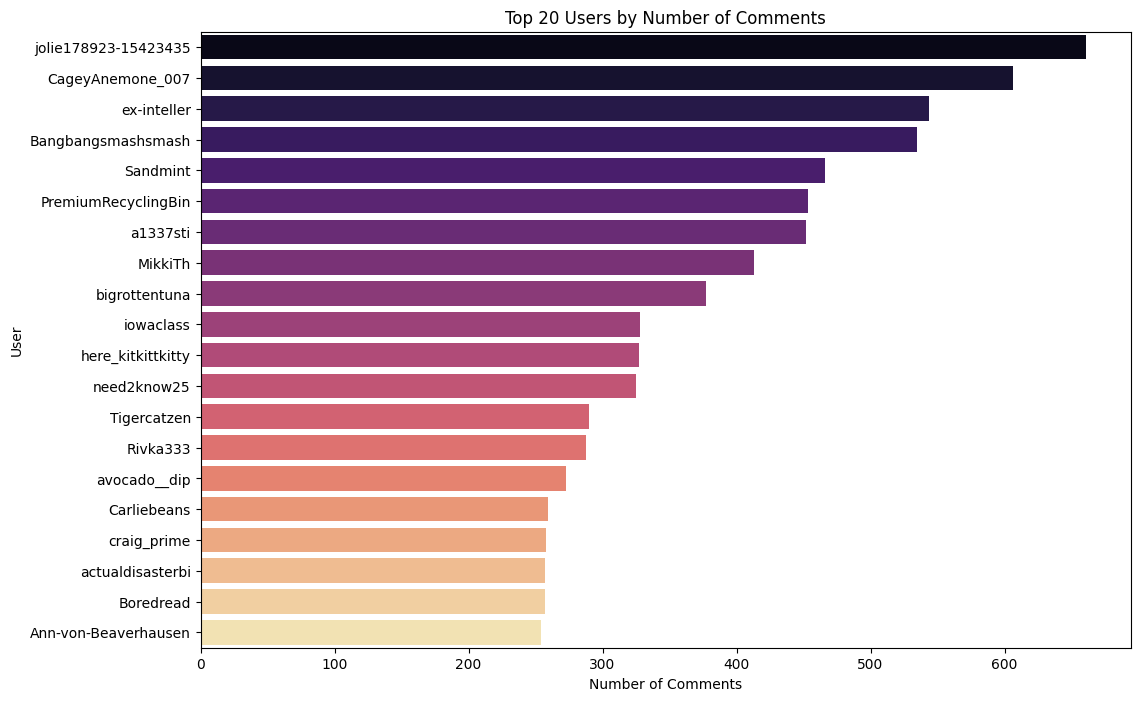

In [31]:
# Counting the number of comments per user
user_activity = social_comments_csv['author_name'].value_counts()

# Selecting the top users for a clearer plot
top_users = user_activity.head(20)

# Creating the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_users.values, y=top_users.index, palette="magma")
plt.title('Top 20 Users by Number of Comments')
plt.xlabel('Number of Comments')
plt.ylabel('User')
plt.show()


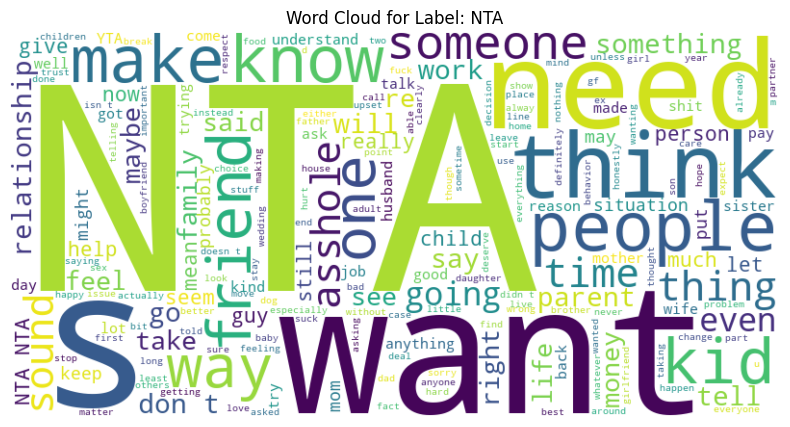

In [21]:
# Function to generate a word cloud for a given label
def generate_wordcloud(label, data):
    # Filtering comments for the specific label
    comments = data[data['label'] == label]['body']

    # Combining all comments into a single string
    text = " ".join(comment for comment in comments)

    # Generating a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Displaying the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Label: {label}")
    plt.show()

# Example usage
example_label = social_comments_csv['label'].unique()[0]
generate_wordcloud(example_label, social_comments_csv)

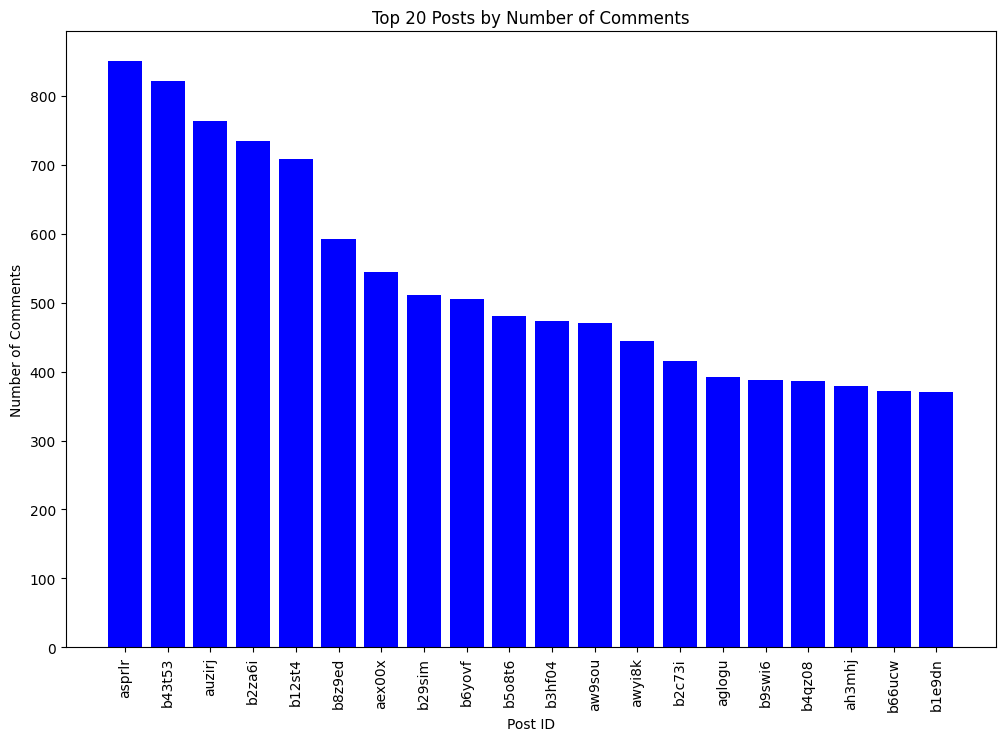

In [26]:
# Counting the number of comments for each post
post_comments = social_comments_csv['parent_id'].value_counts()

# Selecting the top posts
top_posts = post_comments.head(20)

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_posts.index, top_posts.values, color='blue')
plt.title('Top 20 Posts by Number of Comments')
plt.xlabel('Post ID')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.show()


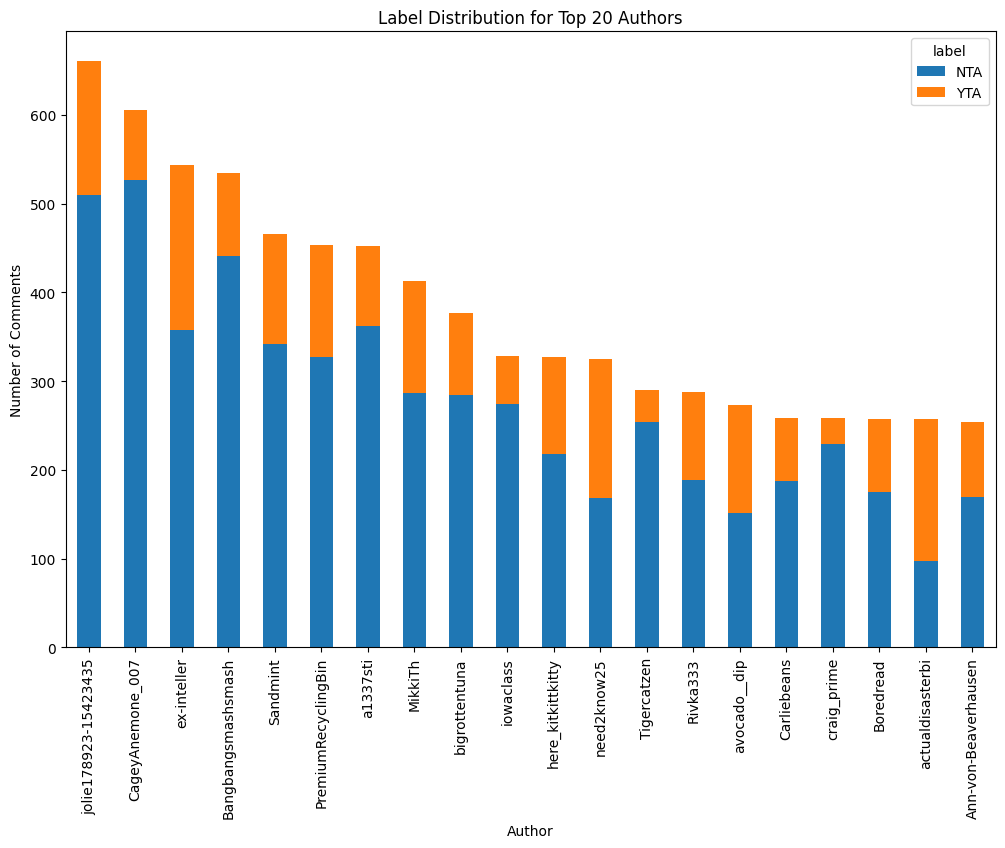

In [29]:
# Aggregating labels per author
author_labels = social_comments_csv.groupby('author_name')['label'].value_counts().unstack().fillna(0)

# Selecting the top authors for a clearer plot
top_authors = author_labels.sum(axis=1).nlargest(20).index
top_authors_data = author_labels.loc[top_authors]

# Creating the stacked bar chart
top_authors_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Label Distribution for Top 20 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Comments')
plt.show()
